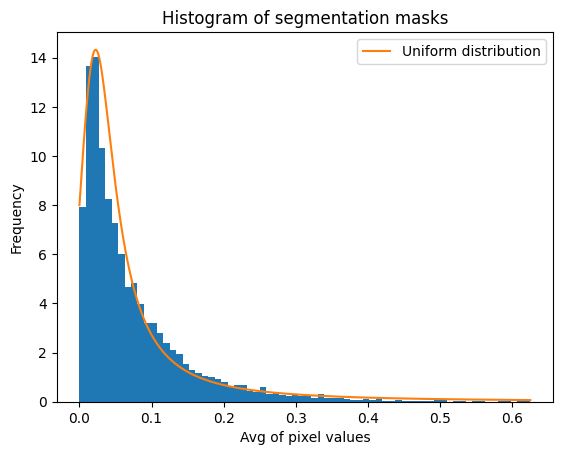

In [34]:
import matplotlib.pyplot as plt
import numpy as np

seg_means = np.load(f"./seg_means_10000.npy")

def curve_fit(x):
    return (440*x+8)/(17000*x**3 + 110*x**2  + 1)

# Plot bar chart of frequency of sums
X = np.linspace(np.min(seg_means), np.max(seg_means), seg_means.shape[0])
plt.hist(seg_means, bins=70, density=True)
plt.plot(X, curve_fit(X), label="Uniform distribution")
plt.legend()
plt.xlabel("Avg of pixel values")
plt.ylabel("Frequency")
plt.title("Histogram of segmentation masks")
plt.show()

Selected 10000
Rejected 75449
Selected ratio 11.702887102248125 %


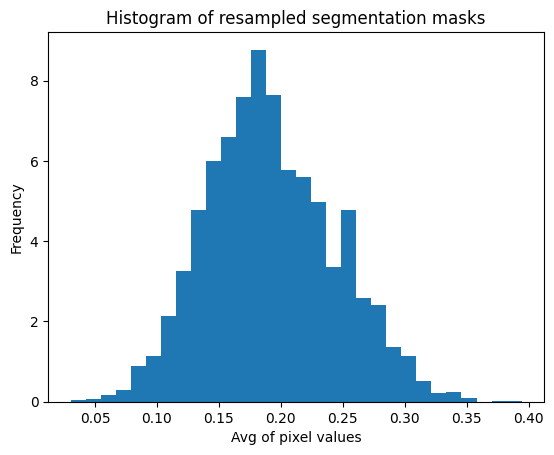

In [45]:
resampled = []
yes = 0
no = 0
M = 1
while len(resampled) != seg_means.shape[0]:
    i = np.random.randint(0, seg_means.shape[0])
    value = seg_means[i]
    p_target = np.exp(-0.5*((value-0.2)/0.05)**2)
    p_current = curve_fit(value) # Dervied from the histogram
    if np.random.rand() < M*p_target/p_current:
        resampled.append(value)
        yes += 1
    else:
        no += 1

print("Selected", yes)
print("Rejected", no)
print("Selected ratio", 100*yes/(yes+no), "%")

plt.hist(resampled, bins=30, density=True)
plt.xlabel("Avg of pixel values")
plt.ylabel("Frequency")
plt.title("Histogram of resampled segmentation masks")
plt.show()